In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import date

In [2]:
from mod_my_utils.read_write_data import *
from mod_backtest_utils.backtest_rsi import RSIStrategy
from mod_backtest_utils.portfolio import MarketOnPricePortfolio

In [3]:
folder_path = 'data/'
stock_name = 'AAPL'
index_col = 'Date'

period = 50
buy_threshold = 20
sell_threshold = 80

In [4]:
stock_data = get_price_csv(folder_name=folder_path,symbol=stock_name, index_col=index_col)

stock name:  AAPL


In [5]:
data = stock_data[["Adj. Close"]].copy()
data.columns = ["price"]
data.head()

,price
Date,
2007-12-03,22.986003
2007-12-04,23.108091
2007-12-05,23.839335
2007-12-06,24.411582
2007-12-07,24.970258


In [6]:
### Strategy

In [7]:
rsi = RSIStrategy(stock_name, data, period=period, buy_threshold=buy_threshold, sell_threshold=sell_threshold)

In [8]:
signals = rsi.generate_signals()

In [9]:
portfolio = MarketOnPricePortfolio(stock_name, signals=signals)

In [10]:
rsi_portfolio = portfolio.backtest_portfolio()

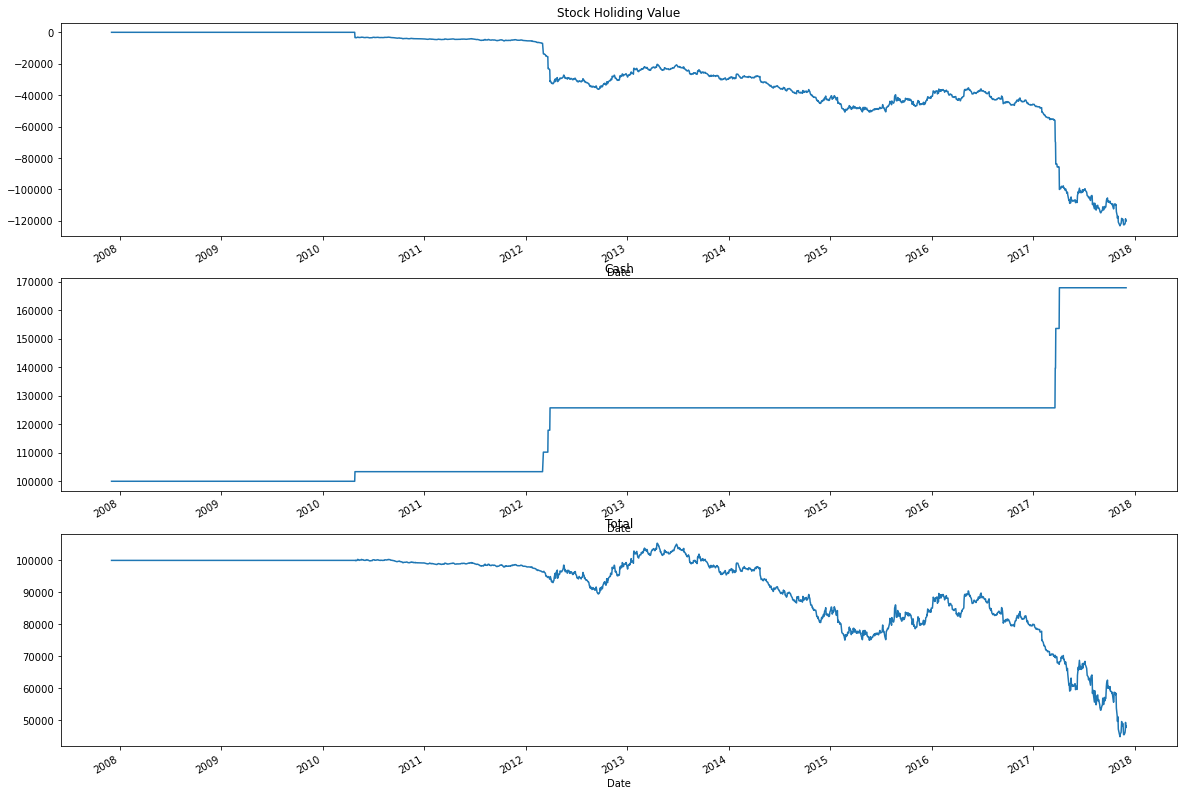

In [11]:
portfolio.plot_stock_portfolio()